## Setup

In [1]:
# Packages
import pandas as pd
import torch
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pylab
import math

In [2]:
# Import and process data
tor_df = pd.read_csv("/home/jeremy/github_tornadoesr/data/raw/tor_train_set_no_zeros_interact.csv")



# Get and process outcomes
# Get them
tornado_outcomes = tor_df.iloc[:, [0]]

# Make them into a numpy array
outcomes_array = tornado_outcomes.values


# Make the numpy array into a torch Tensor
outcomes_Tensor = torch.from_numpy(outcomes_array)

# Change that from a DoubleTensor to a FloatTensor
outcomes_Tensor = outcomes_Tensor.float()



# Get and process predictors
# Get them
tornado_features = tor_df.iloc[:, 1:]

# Make them into a numpy array
features_array = tornado_features.values


# Make the numpy array into a torch Tensor
features_Tensor = torch.from_numpy(features_array)

# Change that from a DoubleTensor to a FloatTensor
features_Tensor = features_Tensor.float()

## One-Hidden-Layer Neural Network

In [3]:
# Make the torch Tensor into a PyTorch Variable for the outcome variable
outcomes_Variable = Variable(outcomes_Tensor)


# ...Also for the predictor variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)   # For backprop

In [4]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(31, 21),
                            torch.nn.ReLU(),
                            torch.nn.Linear(21, 1))

In [5]:
# Set the loss function
loss_fn = torch.nn.MSELoss(size_average=False)

In [6]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 4e-6


# Train the neural network
for t in range(10000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    model.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using gradient descent
    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

In [7]:
# Get the iterations
iterations = list(range(0, 10000))

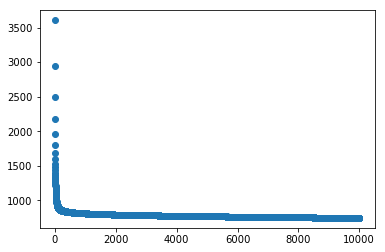

In [8]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors)

In [9]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8270)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

In [10]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
outcomes_Variable_resized = outcomes_Variable.resize(8270)


# Make the FloatTensor into a numpy.array
outcomes_array = outcomes_Variable_resized.data.numpy()


# Make the numpy.array into a list
outcomes_list = outcomes_array.tolist()

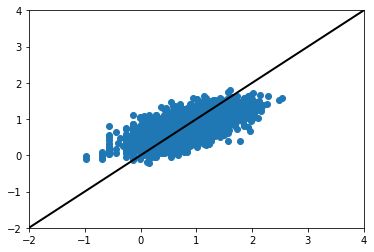

In [11]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

## Cross Validation Set

In [12]:
# Import data
valid_df = pd.read_csv("/home/jeremy/github_tornadoesr/data/raw/tor_cv_set_no_zeros_interact.csv")


# Validation set outcomes
valid_outcomes = valid_df.iloc[:, [0]]


# Make the validation outcomes into a numpy array
valid_outcomes_array = valid_outcomes.values


# Makes the numpy array into a torch Tensor
valid_outcomes_Tensor = torch.from_numpy(valid_outcomes_array)


# Changing validation outcomes from a DoubleTensor to a FloatTensor
valid_outcomes_Tensor = valid_outcomes_Tensor.float()


# Make the Tensor into a Pytorch Variable
valid_outcomes_Variable = Variable(valid_outcomes_Tensor)

In [13]:
# Validation set predictors
valid_predictors = valid_df.iloc[:, 1:]


# Make the validation predictors into a numpy array
valid_predictors_array = valid_predictors.values


# Makes the numpy array into a torch Tensor
valid_predictors_Tensor = torch.from_numpy(valid_predictors_array)


# Changing validation predictors from a DoubleTensor to a FloatTensor
valid_predictors_Tensor = valid_predictors_Tensor.float()


# Make the Tensor into a Pytorch Variable
valid_predictors_Variable = Variable(valid_predictors_Tensor)

## Welp, I've been wasting time and code this whole time

This is good news though, because improvements may come

In [14]:
Huh = model(valid_predictors_Variable)

The big news is that the code above worked; it did not work when I first began for some reason and has led to complications. So, now, those complications are a thing of the past!

In [15]:
loss_fn(Huh, valid_outcomes_Variable)

Variable containing:
 279.2911
[torch.FloatTensor of size 1]

In [16]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
Huh_resized = Huh.resize(2709)


# Make the FloatTensor into a numpy.array
Huh_array = Huh_resized.data.numpy()


# Make the numpy.array into a list
Huh_list = Huh_array.tolist()

In [17]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
valid_outcomes_Variable_resized = valid_outcomes_Variable.resize(2709)


# Make the FloatTensor into a numpy.array
valid_outcomes_array = valid_outcomes_Variable_resized.data.numpy()


# Make the numpy.array into a list
valid_outcomes_list = valid_outcomes_array.tolist()

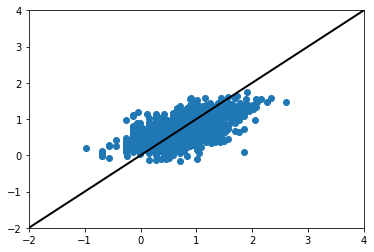

In [18]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, Huh_list)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)